C:\Users\tony\.conda\envs\svs2\lib\site-packages\ipykernel_launcher.py:27: FutureWarning: Pass orig_sr=22050, target_sr=16000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
C:\Users\tony\.conda\envs\svs2\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Pass orig_sr=22050, target_sr=16000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
C:\Users\tony\.conda\envs\svs2\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in log10


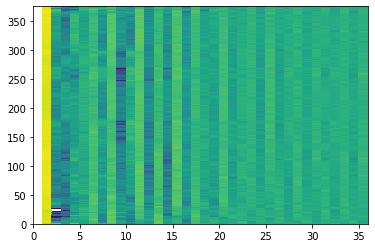

C:\Users\tony\.conda\envs\svs2\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in log10


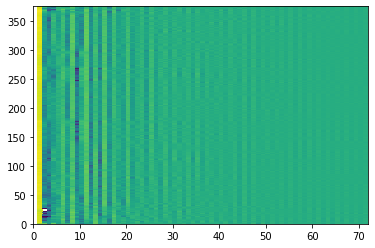

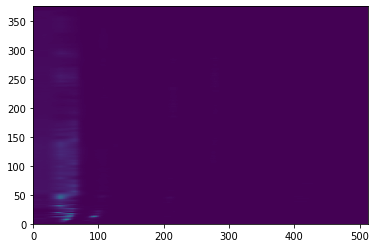

C:\Users\tony\.conda\envs\svs2\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in log10


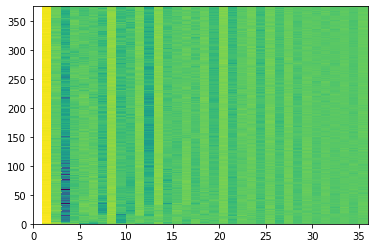

C:\Users\tony\.conda\envs\svs2\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: invalid value encountered in log10


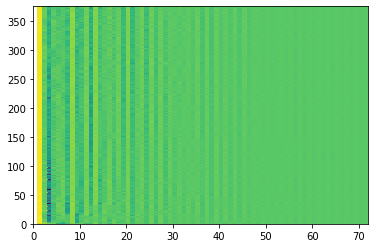

C:\Users\tony\.conda\envs\svs2\lib\site-packages\ipykernel_launcher.py:58: FutureWarning: Pass orig_sr=22050, target_sr=16000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
C:\Users\tony\.conda\envs\svs2\lib\site-packages\ipykernel_launcher.py:60: FutureWarning: Pass orig_sr=22050, target_sr=16000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
C:\Users\tony\.conda\envs\svs2\lib\site-packages\ipykernel_launcher.py:68: RuntimeWarning: invalid value encountered in log10


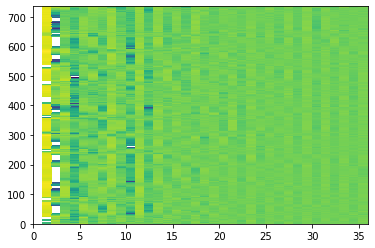

C:\Users\tony\.conda\envs\svs2\lib\site-packages\ipykernel_launcher.py:71: RuntimeWarning: invalid value encountered in log10


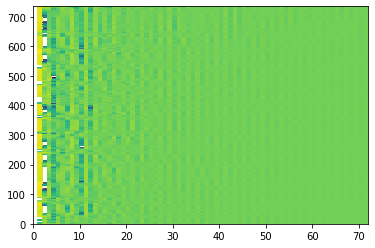

C:\Users\tony\.conda\envs\svs2\lib\site-packages\ipykernel_launcher.py:76: RuntimeWarning: invalid value encountered in log10


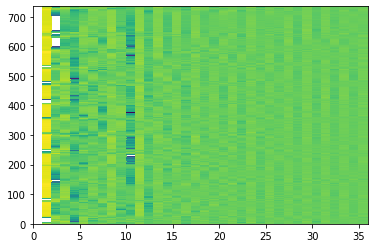

C:\Users\tony\.conda\envs\svs2\lib\site-packages\ipykernel_launcher.py:79: RuntimeWarning: invalid value encountered in log10


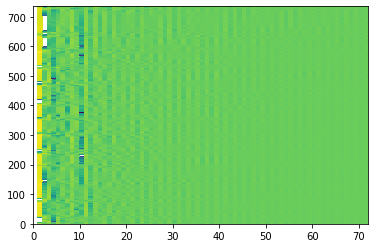

In [17]:
import pyworld
import librosa
import matplotlib.pyplot as plt
import numpy as np


def world_decompose(wav, fs, frame_period=5.0):
    # Decompose speech signal into f0, spectral envelope and aperiodicity using WORLD
    wav = wav.astype(np.float64)
    f0, timeaxis = pyworld.harvest(
        wav, fs, frame_period=frame_period, f0_floor=71.0, f0_ceil=800.0)
    sp = pyworld.cheaptrick(wav, f0, timeaxis, fs)
    ap = pyworld.d4c(wav, f0, timeaxis, fs)
    return f0, timeaxis, sp, ap


def world_encode_spectral_envelop(sp, fs, dim=36):
    # Get Mel-cepstral coefficients (MCEPs)
    #sp = sp.astype(np.float64)
    coded_sp = pyworld.code_spectral_envelope(sp, fs, dim)
    return coded_sp


tar_sr = 16000
frame_period = 5.0
wav_c, sr = librosa.load('./HW3-sounds/m3/ah/chest_aligned.wav')
wav_c = librosa.resample(wav_c, sr, tar_sr)
wav_f, sr = librosa.load('./HW3-sounds/m3/ah/falset_aligned.wav')
wav_f = librosa.resample(wav_f, sr, tar_sr)
f0_c, timeaxis_c, sp_c, ap_c = world_decompose(
    wav=wav_c, fs=sr, frame_period=frame_period)
f0_f, timeaxis_f, sp_f, ap_f = world_decompose(
    wav=wav_f, fs=sr, frame_period=frame_period)
C_coded_sp_36 = world_encode_spectral_envelop(sp_c, sr, 36)
C_coded_sp_72 = world_encode_spectral_envelop(sp_c, sr, 72)
plt.figure()
plt.pcolor(20*np.log10(C_coded_sp_36+1))
plt.show()
plt.figure()
plt.pcolor(20*np.log10(C_coded_sp_72+1))
plt.show()
plt.figure()
plt.pcolor(sp_c+1)
plt.show()
F_coded_sp_36 = world_encode_spectral_envelop(sp_f, sr, 36)
F_coded_sp_72 = world_encode_spectral_envelop(sp_f, sr, 72)
plt.figure()
plt.pcolor(20*np.log10(F_coded_sp_36+1))
plt.show()
plt.figure()
plt.pcolor(20*np.log10(F_coded_sp_72+1))
plt.show()


tar_sr = 16000
frame_period = 5.0
wav_c, sr = librosa.load('./HW3-sounds/m3/a_phrase/m3_chest_align.wav')
wav_c = librosa.resample(wav_c, sr, tar_sr)
wav_f, sr = librosa.load('./HW3-sounds/m3/a_phrase/m3_falset_align.wav')
wav_f = librosa.resample(wav_f, sr, tar_sr)
f0_c, timeaxis_c, sp_c, ap_c = world_decompose(
    wav=wav_c, fs=sr, frame_period=frame_period)
f0_f, timeaxis_f, sp_f, ap_f = world_decompose(
    wav=wav_f, fs=sr, frame_period=frame_period)
C_coded_sp_36 = world_encode_spectral_envelop(sp_c, sr, 36)
C_coded_sp_72 = world_encode_spectral_envelop(sp_c, sr, 72)
plt.figure()
plt.pcolor(20*np.log10(C_coded_sp_36+1))
plt.show()
plt.figure()
plt.pcolor(20*np.log10(C_coded_sp_72+1))
plt.show()
F_coded_sp_36 = world_encode_spectral_envelop(sp_f, sr, 36)
F_coded_sp_72 = world_encode_spectral_envelop(sp_f, sr, 72)
plt.figure()
plt.pcolor(20*np.log10(F_coded_sp_36+1))
plt.show()
plt.figure()
plt.pcolor(20*np.log10(F_coded_sp_72+1))
plt.show()
